<a href="https://colab.research.google.com/github/Ru1chi/Deep_learning/blob/main/Dgg_v_s_Cat_using__transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tanfer Learning**

DL technique to use pre-trained model.it is trained for 1 task and can be re-trained for similar task with smaller dataset

examples:

 VGG-16


ResNet50


Inceptionv3


MobileNetv2

In [1]:
!pip install kaggle

In [8]:
#configuring the path of kaggle file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## **Importing dog v/s cat datset from kaggle**


In [9]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:10<00:00, 149MB/s]
100% 812M/812M [00:10<00:00, 81.3MB/s]


In [10]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [11]:
#extract the compressed file
from zipfile import ZipFile#function to extract the zip file

dataset='dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted.")

The dataset is extracted.


In [12]:
#extract the compressed file
from zipfile import ZipFile#function to extract the zip file

dataset='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted.")

The dataset is extracted.


In [13]:
import os


## **finding the number of images in the train directory**

In [14]:
#counting the number of files in the trained folder
path,directories,files=next(os.walk('/content/train'))# to traverse a directory tree and retrieve information about the specified directory and its contents.
file_count=len(files)
print("Number of images in train directory:",file_count)

Number of images in train directory: 25000


## **Printing the name of images**

In [15]:
file_name=os.listdir("/content/train")#.os function as listdir shows all the names of the files
print(file_name)

['cat.3046.jpg', 'cat.12152.jpg', 'dog.11827.jpg', 'dog.4036.jpg', 'dog.11294.jpg', 'cat.1919.jpg', 'cat.8323.jpg', 'dog.794.jpg', 'dog.2266.jpg', 'cat.8918.jpg', 'cat.9686.jpg', 'dog.5212.jpg', 'dog.6850.jpg', 'dog.6255.jpg', 'dog.3392.jpg', 'dog.7702.jpg', 'dog.8629.jpg', 'cat.760.jpg', 'cat.11562.jpg', 'dog.3030.jpg', 'cat.10217.jpg', 'dog.7447.jpg', 'cat.2589.jpg', 'dog.6724.jpg', 'dog.11836.jpg', 'dog.10892.jpg', 'dog.7997.jpg', 'cat.5905.jpg', 'dog.2747.jpg', 'cat.5278.jpg', 'cat.1276.jpg', 'cat.3773.jpg', 'cat.8195.jpg', 'dog.10848.jpg', 'cat.2749.jpg', 'cat.2984.jpg', 'dog.3629.jpg', 'dog.1882.jpg', 'dog.3550.jpg', 'cat.9015.jpg', 'dog.3770.jpg', 'cat.568.jpg', 'cat.4346.jpg', 'dog.10409.jpg', 'dog.6682.jpg', 'dog.8919.jpg', 'cat.5852.jpg', 'dog.11556.jpg', 'dog.5301.jpg', 'dog.7557.jpg', 'cat.340.jpg', 'dog.2937.jpg', 'cat.3535.jpg', 'cat.1638.jpg', 'cat.6666.jpg', 'cat.9332.jpg', 'dog.10271.jpg', 'cat.10930.jpg', 'cat.7669.jpg', 'dog.6696.jpg', 'dog.4305.jpg', 'cat.3063.jpg',

importing the dependencies
## **bold text**

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


## **Displaying the images of dog and cats**





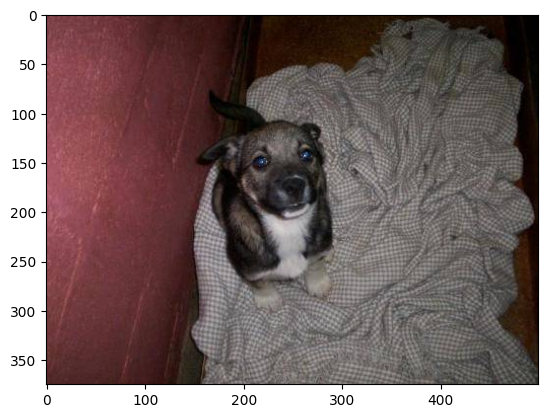

In [17]:
#display dog image
img_dog=mpimg.imread('/content/train/dog.11827.jpg')
img_plot=plt.imshow(img_dog)


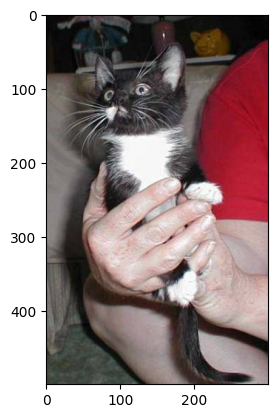

In [18]:
#display cat image
img_cat=mpimg.imread('/content/train/cat.12152.jpg')
img_plot=plt.imshow(img_cat)


## **The size of all the images are different,therefore we need to resize the images**

In [19]:
file_name=os.listdir("/content/train")

for i in range(5):#run the for loop for first 5 times only
  name=file_name[i]
  print(name[0:3])

cat
cat
dog
dog
dog


In [20]:
file_name=os.listdir("/content/train")
dog_count=0
cat_count=0


for img_file in file_name:
  name= img_file[0:3]

  if name=='dog':
    dog_count+=1
  else:
    cat_count+=1

print("Dog images=",dog_count)

print("Cat images=",cat_count)


Dog images= 12500
Cat images= 12500


In [21]:
#we are not going to take all the imges


In [22]:
#creating a new directory for resized images
os.mkdir("/content/resized_images")


In [23]:
original_folder='/content/train/'#include the forward slash
resized_folder="/content/resized_images/"


for i in range(2000):
  filename=os.listdir(original_folder)[i]#uses the original_folder of i
  img_path=original_folder+filename#concatenate this 2 things(the folder and the filename )

  img=Image.open(img_path)#to read the file
  img=img.resize((224,224))#we need to use for tranfer learning
  img=img.convert('RGB')

  new_img_path=resized_folder+filename
  img.save(new_img_path)#save the new resized image

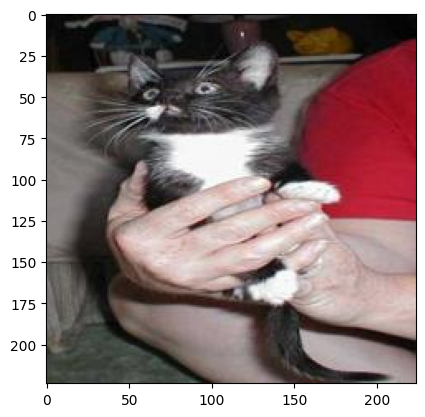

In [24]:
#display resized cat image
img_cat=mpimg.imread('/content/resized_images/cat.12152.jpg')
img_plot=plt.imshow(img_cat)
plt.show()


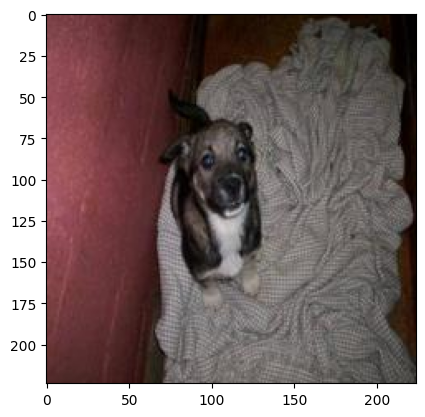

In [25]:
#display resized dog image
img_dog=mpimg.imread('/content/resized_images/dog.11827.jpg')
img_plot=plt.imshow(img_dog)
plt.show()



## Cat---->0


## Dog---->1  

In [26]:
#creating labels of resized images of cats and dogs
#creating for loop
filenames=os.listdir("/content/resized_images")

labels=[]

for i in range(2000):
  file_name=filenames[i]#the original name of the image
  label=file_name[0:3]#for ex: in dog.11827.jpg the first 3 letters will be sliced and taken as label

  if label=='dog':
    labels.append(1)

  else:
    labels.append(0)


In [27]:
print(filenames[0:5])


['cat.3046.jpg', 'cat.12152.jpg', 'dog.11827.jpg', 'dog.4036.jpg', 'dog.11294.jpg']


In [28]:
print(len(filenames))

2000


In [29]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 1, 1]
2000


In [30]:
#counting the images of cats and dog out of 2000 images
values ,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 994 1006]


## **converts images into numpy array**

In [31]:
import cv2
import glob

In [32]:
image_directory="/content/resized_images/"
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory + '*.' +e)) for e in image_extension]#glob is used to read the file || file.extend is similar to append

dog_cat_images=np.asarray([cv2.imread(file) for file in files])#cv2 will read the image and convert int no array


In [33]:
print(dog_cat_images)

[[[[147 136 122]
   [146 137 123]
   [146 136 126]
   ...
   [176 151 117]
   [176 151 117]
   [176 151 117]]

  [[151 140 126]
   [151 140 126]
   [149 139 129]
   ...
   [179 154 120]
   [179 154 120]
   [178 153 119]]

  [[155 144 130]
   [155 144 130]
   [154 144 134]
   ...
   [183 158 124]
   [182 157 123]
   [182 157 123]]

  ...

  [[ 37  65  89]
   [ 37  65  89]
   [ 38  66  90]
   ...
   [ 50  65 104]
   [ 52  67 106]
   [ 53  69 106]]

  [[ 36  63  89]
   [ 37  64  90]
   [ 38  66  90]
   ...
   [ 49  62 100]
   [ 51  64 102]
   [ 53  67 103]]

  [[ 36  63  89]
   [ 37  64  90]
   [ 38  66  90]
   ...
   [ 47  60  98]
   [ 52  64 100]
   [ 54  66 102]]]


 [[[ 23  23  23]
   [ 20  20  20]
   [ 17  17  17]
   ...
   [ 16  16  16]
   [ 20  20  20]
   [ 23  23  23]]

  [[ 18  18  18]
   [ 15  15  15]
   [ 12  12  12]
   ...
   [ 15  15  15]
   [ 18  18  18]
   [ 19  19  19]]

  [[ 15  15  15]
   [ 12  12  12]
   [  9   9   9]
   ...
   [ 12  12  12]
   [ 13  13  13]
   [ 14  14

In [34]:
type(dog_cat_images)

numpy.ndarray

In [35]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [36]:
x=dog_cat_images#contains the images
y=np.asarray(labels)#stores the corresponding label as cat or a dog

## **Train-test_split**

In [37]:


x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)#labels will be stored in y_trained,x_train stores the images

In [38]:
x_train.shape

(1600, 224, 224, 3)

In [39]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


## **Scaling the data**

In [40]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [41]:
print(x_train_scaled)

[[[[0.58431373 0.7254902  0.67058824]
   [0.5254902  0.66666667 0.61176471]
   [0.58823529 0.72941176 0.6745098 ]
   ...
   [0.57254902 0.71764706 0.67843137]
   [0.57647059 0.72156863 0.68235294]
   [0.56078431 0.70588235 0.66666667]]

  [[0.58431373 0.7254902  0.67058824]
   [0.5254902  0.66666667 0.61176471]
   [0.54509804 0.68627451 0.63137255]
   ...
   [0.52156863 0.66666667 0.62745098]
   [0.54901961 0.69411765 0.65490196]
   [0.56862745 0.71372549 0.6745098 ]]

  [[0.58823529 0.72941176 0.6745098 ]
   [0.54117647 0.68235294 0.62745098]
   [0.52156863 0.6627451  0.60784314]
   ...
   [0.47843137 0.62352941 0.58431373]
   [0.51764706 0.6627451  0.62352941]
   [0.56078431 0.70588235 0.66666667]]

  ...

  [[0.72941176 0.90588235 0.84313725]
   [0.68235294 0.85882353 0.79607843]
   [0.52941176 0.70588235 0.64313725]
   ...
   [0.21960784 0.22352941 0.20784314]
   [0.23529412 0.23921569 0.22352941]
   [0.20392157 0.20784314 0.19215686]]

  [[0.56470588 0.74117647 0.67843137]
   [0.5

In [42]:
x_test_scaled

array([[[[0.02745098, 0.04313725, 0.02352941],
         [0.        , 0.01568627, 0.        ],
         [0.00784314, 0.02352941, 0.00392157],
         ...,
         [0.26666667, 0.25490196, 0.2       ],
         [0.27058824, 0.25882353, 0.20392157],
         [0.27058824, 0.25882353, 0.20392157]],

        [[0.03921569, 0.05490196, 0.03529412],
         [0.00784314, 0.02352941, 0.00392157],
         [0.01960784, 0.03529412, 0.01568627],
         ...,
         [0.26666667, 0.25490196, 0.2       ],
         [0.27058824, 0.25882353, 0.20392157],
         [0.27058824, 0.25882353, 0.20392157]],

        [[0.05098039, 0.06666667, 0.04705882],
         [0.01960784, 0.03529412, 0.01568627],
         [0.02745098, 0.04313725, 0.02352941],
         ...,
         [0.26666667, 0.25490196, 0.2       ],
         [0.27058824, 0.25882353, 0.20392157],
         [0.27058824, 0.25882353, 0.20392157]],

        ...,

        [[0.57254902, 0.56862745, 0.52941176],
         [0.56862745, 0.56470588, 0.5254902 ]

## **Building a neural Network**

we are going to use pre-trained model as mobilenet

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [45]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)#it justifies if the particular model is trainable or not




In [49]:
num_of_classes=2#(dog and cat)

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)#include the output layer and justify the num of classes
])

#print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [50]:
model.compile(

              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

In [51]:
#we need the pass the x_trained_scales and the labels (y_train)
model.fit(x_train_scaled,y_train,epochs=5)


Epoch 1/5
50/50 [==============================] - 73s 1s/step - loss: 0.2412 - accuracy: 0.8931
Epoch 2/5
50/50 [==============================] - 74s 1s/step - loss: 0.0687 - accuracy: 0.9781
Epoch 3/5
50/50 [==============================] - 77s 2s/step - loss: 0.0530 - accuracy: 0.9862
Epoch 4/5
50/50 [==============================] - 69s 1s/step - loss: 0.0425 - accuracy: 0.9887
Epoch 5/5
50/50 [==============================] - 74s 1s/step - loss: 0.0386 - accuracy: 0.9869


In [52]:
score,accuracy=model.evaluate(x_test_scaled,y_test)
print("The loss is:",score)
print("The accuracy is:",accuracy)



13/13 [==============================] - 19s 1s/step - loss: 0.0515 - accuracy: 0.9775
The loss is: 0.05152862146496773
The accuracy is: 0.9775000214576721


## **Building the predictive system**


Path of image to be predicted:/content/cat.jpg


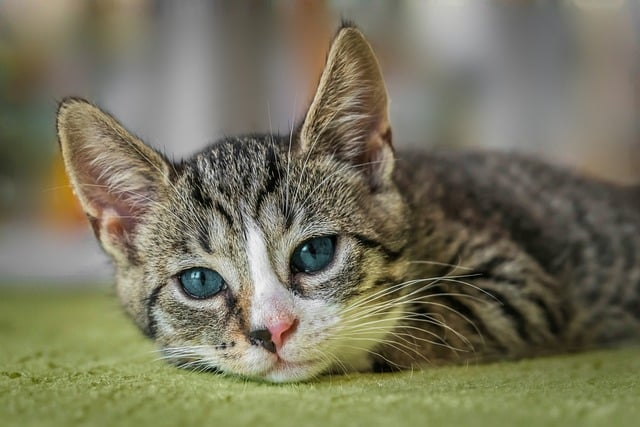

1/1 [==============================] - 1s 652ms/step
The image represent a Cat.


In [53]:
input_image_path=input("Path of image to be predicted:")#get the path of image

input_image=cv2.imread(input_image_path)#read the image and load it to as numpy array

cv2_imshow(input_image)#display the image

input_image_resized=cv2.resize(input_image,(224,224))#resize the image

input_image_scales=input_image_resized/255#scale the image for values in array to be between 0-1

image_reshaped=np.reshape(input_image_scales,[1,224,224,3])#reshape the image to tell the model that I am  making prediction for only one image

image_prediction=model.predict(image_reshaped)#make the predictions using the model

input_pred_label=np.argmax(image_prediction)#used to find the index of the maximum value in an array

if input_pred_label==0:
  print("The image represent a Cat.")

else:
  print("The image represents a Dog.")





Path of image to be predicted:/content/dog.jpg


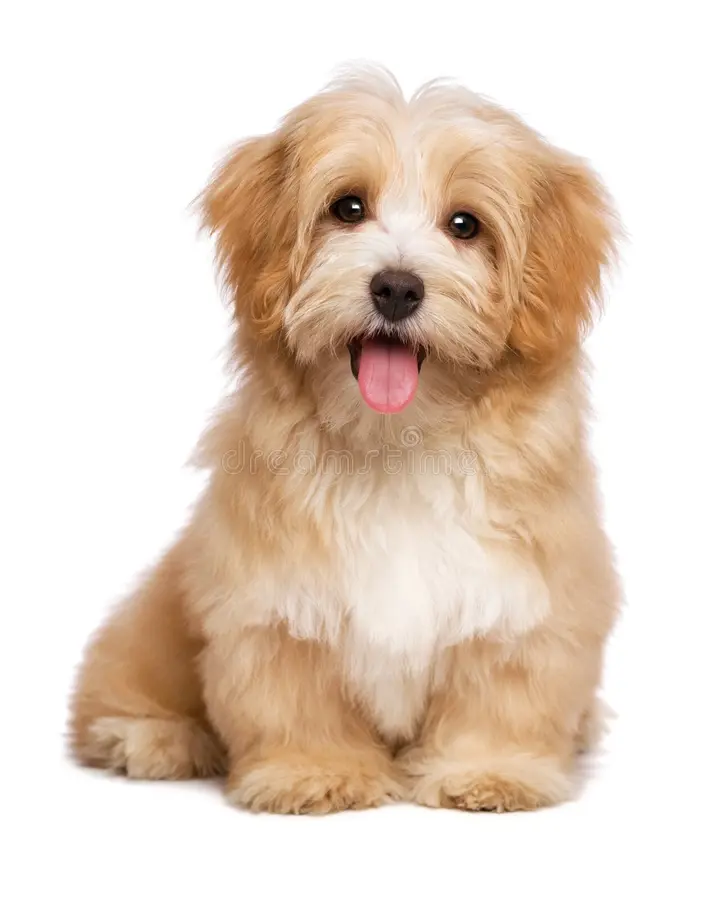

1/1 [==============================] - 0s 110ms/step
The image represents a Dog.


In [54]:
input_image_path=input("Path of image to be predicted:")#get the path of image

input_image=cv2.imread(input_image_path)#read the image and load it to as numpy array

cv2_imshow(input_image)#display the image

input_image_resized=cv2.resize(input_image,(224,224))#resize the image

input_image_scales=input_image_resized/255#scale the image for values in array to be between 0-1

image_reshaped=np.reshape(input_image_scales,[1,224,224,3])#reshape the image to tell the model that I am  making prediction for only one image

image_prediction=model.predict(image_reshaped)#make the predictions using the model

input_pred_label=np.argmax(image_prediction)#used to find the index of the maximum value in an array

if input_pred_label==0:
  print("The image represent a Cat.")

else:
  print("The image represents a Dog.")



